## 이런 느낌?

### 데이터 불러오기

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
plt.rc("font", family="Malgun Gothic") # 시각화 할때 한글이 볼수 있게 하겠다
plt.rc("axes", unicode_minus=False) # 마이너스 부호가 보일수 있게 하겠다
# pd.options.display.max_columns = None
df = pd.read_csv('../main/수명주기붙힌거공백제거v3.csv',encoding="cp949")
# df['회생기업2'] = df['회생기업2'].fillna(0)
# df['회생기업1'] = df['회생기업1'].fillna(0)
# df['회생기업2'] = df['회생기업2'].fillna(0)
# df['회계년도'] = pd.to_datetime(df['회계년도'], format='%d-%b').dt.strftime('20%d-%m')
# df['재고자산회전율'] = df['재고자산회전율'].fillna(0)
# df['매입채무회전율'] = df['매입채무회전율'].fillna(0)
# df['매출채권_대_매입채무비율'] = df['매출채권_대_매입채무비율'].fillna(0)
df = df.sort_values(by='회계년도')
df = df.reset_index(drop=True)
df

,회사명,거래소코드,회계년도,이자보상배율,총자산증가율,유형자산증가율,유동자산증가율,자기자본증가율,매출액증가율,매출액총이익율,...,매출원가감소율여부,배당금감소율여부,변화율여부,직원감소율여부,자본증가율여부,투자활동감소율여부,기업수명주기,통계청한국표준산업분류10차(세세분류),회생기업1,회생기업2
0,(주)CMG제약,58820,201112,3.53,1.98,-5.90,17.64,-2.02,56.40,41.83,...,1,0,0,0,0,0,1,의약품제조업,0,0
1,(주)디아크,78590,201112,10.43,13.04,1.71,35.94,29.14,47.52,14.36,...,0,0,0,0,0,0,4,그외자동차용신품부품제조업,0,0
2,(주)옵트론텍,82210,201112,2.39,3.11,0.01,4.78,21.79,-6.84,21.81,...,0,0,0,0,0,1,3,사진장비및광학기기제조업,0,0
3,상신이디피(주),91580,201112,6.82,11.97,19.54,3.13,20.61,37.83,14.77,...,0,0,0,0,0,0,2,축전지제조업,0,0
4,(주)오픈베이스,49480,201112,4.26,1.83,-0.28,4.69,3.74,38.02,22.83,...,0,0,0,0,0,0,2,컴퓨터시스템통합자문및구축서비스업,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8743,(주)에스에이엠티,31330,201912,14.78,-11.14,-7.71,-20.47,11.28,3.22,4.21,...,0,0,0,0,0,0,3,수송용운송장비도매업,0,1
8744,에스디엔(주),99220,201912,1.17,15.14,29.09,23.35,13.58,6.79,26.67,...,0,0,0,0,0,1,2,수송용운송장비도매업,0,0
8745,(주)에스에이티,60540,201912,11.61,9.86,-0.54,17.31,9.02,4.65,16.69,...,0,0,0,0,0,0,2,기기용자동측정및제어장치제조업,0,1
8746,(주)에스비에스,34120,201912,1.97,30.29,2.62,45.27,13.83,-10.54,19.61,...,0,1,0,0,0,0,5,지상파방송업,0,1


In [85]:
# df.to_csv('레이블합친최종본.csv',encoding='cp949',index=False)

In [86]:
# df.isna().sum()

### 3년 으로 나누기

In [87]:
df = df.sort_values(by='회계년도')
df = df.reset_index(drop=True)
df_2011 = df.loc[:2651]
df_2012 = df.loc[862:3596]
df_2012 = df_2012.reset_index(drop=True)
df_2013 = df.loc[1742:4590]
df_2013 = df_2013.reset_index(drop=True)
df_2014 = df.loc[2652:5610]
df_2014 = df_2014.reset_index(drop=True)
df_2015 = df.loc[3597:6656]
df_2015 = df_2015.reset_index(drop=True)
df_2016 = df.loc[4591:7702]
df_2016 = df_2016.reset_index(drop=True)
df_2017 = df.loc[5611:]
df_2017 = df_2017.reset_index(drop=True)

### 결측치 확인

In [88]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# plt.rc("font", family="Malgun Gothic") # 시각화 할때 한글이 볼수 있게 하겠다
# plt.rc("axes", unicode_minus=False)
# plt.figure(figsize=(30,25))

# sns.heatmap(df.isna())

### 아직 결정된건 아니지만 일단 남은 결측치 평균으로 채워넣고 남는 결측치는 제거한다

In [89]:
# means = lambda x: x.fillna(x.mean())
# df = df.groupby('회사명').apply(means)
# df = df.dropna()
# df = df.reset_index(drop=True)
# df.isna().sum()

In [90]:
# df.info()

In [91]:
# df.columns

### 아상치 확인

In [92]:
# from matplotlib.pyplot import imread

# fig, axes = plt.subplots(8, 6)
# fig.set_size_inches((40,20))

# df.boxplot(column='이자보상배율', ax=axes[0,0])
# df.boxplot(column='총자산증가율', ax=axes[0,1])
# df.boxplot(column='유형자산증가율', ax=axes[0,2])
# df.boxplot(column='유동자산증가율', ax=axes[0,3])
# df.boxplot(column='자기자본증가율', ax=axes[0,4])
# df.boxplot(column='매출액증가율', ax=axes[0,5])
# df.boxplot(column='매출액총이익율', ax=axes[1,0])
# df.boxplot(column='매출액순이익율', ax=axes[1,1])
# df.boxplot(column='자기자본순이익율', ax=axes[1,2])
# df.boxplot(column='총자본영업이익율', ax=axes[1,3])
# df.boxplot(column='매출액영업이익률', ax=axes[1,4])
# df.boxplot(column='총자본순이익률', ax=axes[1,5])
# df.boxplot(column='총자본회전율', ax=axes[2,0])
# df.boxplot(column='재고자산회전율', ax=axes[2,1])
# df.boxplot(column='매출채권회전율', ax=axes[2,2])
# df.boxplot(column='유형자산회전율', ax=axes[2,3])
# df.boxplot(column='매입채무회전율', ax=axes[2,4])
# df.boxplot(column='자기자본회전율', ax=axes[2,5])
# df.boxplot(column='타인자본회전율', ax=axes[3,0])
# df.boxplot(column='유동자산회전율', ax=axes[3,1])
# df.boxplot(column='순운전자본회전율', ax=axes[3,2])
# df.boxplot(column='유동비율', ax=axes[3,3])
# df.boxplot(column='당좌비율', ax=axes[3,4])
# df.boxplot(column='현금비율', ax=axes[3,5])
# df.boxplot(column='부채비율', ax=axes[4,0])
# df.boxplot(column='차입금의존도', ax=axes[4,1])
# df.boxplot(column='CASH_FLOW_대_부채비율', ax=axes[4,2])
# df.boxplot(column='CASH_FLOW_대_매출액비율', ax=axes[4,3])
# df.boxplot(column='CASH_FLOW_대_차입금비율', ax=axes[4,4])
# df.boxplot(column='자기자본구성비율', ax=axes[4,5])
# df.boxplot(column='당좌자산구성비율', ax=axes[5,0])
# df.boxplot(column='유동자산구성비율', ax=axes[5,1])
# df.boxplot(column='매출채권_대_매입채무비율', ax=axes[5,2])
# df.boxplot(column='유동부채비율', ax=axes[5,3])
# df.boxplot(column='타인자본구성비율', ax=axes[5,4])
# df.boxplot(column='재고자산_대_유동자산비율', ax=axes[5,5])
# df.boxplot(column='재고자산_대_순운전자본비율', ax=axes[6,0])
# df.boxplot(column='순운전자본비율', ax=axes[6,1])
# df.boxplot(column='노동장비율', ax=axes[6,2])
# df.boxplot(column='기계장비율', ax=axes[6,3])
# df.boxplot(column='자본집약도', ax=axes[6,4])
# df.boxplot(column='설비투자효율', ax=axes[6,5])
# df.boxplot(column='총자본투자효율', ax=axes[7,0])
# df.boxplot(column='부가가치율', ax=axes[7,1])
# df.boxplot(column='종업원1인당부가가치', ax=axes[7,2])
# df.boxplot(column='R & D 투자효율', ax=axes[7,3])

# plt.show()

In [93]:
# df.columns

### 이상치 조정

In [94]:
# from scipy.stats.mstats import winsorize
# df1 = df.copy()
# for col in df1.columns:
#      df1[col] = winsorize(df1[col], limits= 0.025)

In [95]:
# from matplotlib.pyplot import imread

# fig, axes = plt.subplots(8, 6)
# fig.set_size_inches((40,20))

# df1.boxplot(column='이자보상배율', ax=axes[0,0])
# df1.boxplot(column='총자산증가율', ax=axes[0,1])
# df1.boxplot(column='유형자산증가율', ax=axes[0,2])
# df1.boxplot(column='유동자산증가율', ax=axes[0,3])
# df1.boxplot(column='자기자본증가율', ax=axes[0,4])
# df1.boxplot(column='매출액증가율', ax=axes[0,5])
# df1.boxplot(column='매출액총이익율', ax=axes[1,0])
# df1.boxplot(column='매출액순이익율', ax=axes[1,1])
# df1.boxplot(column='자기자본순이익율', ax=axes[1,2])
# df1.boxplot(column='총자본영업이익율', ax=axes[1,3])
# df1.boxplot(column='매출액영업이익률', ax=axes[1,4])
# df1.boxplot(column='총자본순이익률', ax=axes[1,5])
# df1.boxplot(column='총자본회전율', ax=axes[2,0])
# df1.boxplot(column='재고자산회전율', ax=axes[2,1])
# df1.boxplot(column='매출채권회전율', ax=axes[2,2])
# df1.boxplot(column='유형자산회전율', ax=axes[2,3])
# df1.boxplot(column='매입채무회전율', ax=axes[2,4])
# df1.boxplot(column='자기자본회전율', ax=axes[2,5])
# df1.boxplot(column='타인자본회전율', ax=axes[3,0])
# df1.boxplot(column='유동자산회전율', ax=axes[3,1])
# df1.boxplot(column='순운전자본회전율', ax=axes[3,2])
# df1.boxplot(column='유동비율', ax=axes[3,3])
# df1.boxplot(column='당좌비율', ax=axes[3,4])
# df1.boxplot(column='현금비율', ax=axes[3,5])
# df1.boxplot(column='부채비율', ax=axes[4,0])
# df1.boxplot(column='차입금의존도', ax=axes[4,1])
# df1.boxplot(column='CASH_FLOW_대_부채비율', ax=axes[4,2])
# df1.boxplot(column='CASH_FLOW_대_매출액비율', ax=axes[4,3])
# df1.boxplot(column='CASH_FLOW_대_차입금비율', ax=axes[4,4])
# df1.boxplot(column='자기자본구성비율', ax=axes[4,5])
# df1.boxplot(column='당좌자산구성비율', ax=axes[5,0])
# df1.boxplot(column='유동자산구성비율', ax=axes[5,1])
# df1.boxplot(column='매출채권_대_매입채무비율', ax=axes[5,2])
# df1.boxplot(column='유동부채비율', ax=axes[5,3])
# df1.boxplot(column='타인자본구성비율', ax=axes[5,4])
# df1.boxplot(column='재고자산_대_유동자산비율', ax=axes[5,5])
# df1.boxplot(column='재고자산_대_순운전자본비율', ax=axes[6,0])
# df1.boxplot(column='순운전자본비율', ax=axes[6,1])
# df1.boxplot(column='노동장비율', ax=axes[6,2])
# df1.boxplot(column='기계장비율', ax=axes[6,3])
# df1.boxplot(column='자본집약도', ax=axes[6,4])
# df1.boxplot(column='설비투자효율', ax=axes[6,5])
# df1.boxplot(column='총자본투자효율', ax=axes[7,0])
# df1.boxplot(column='부가가치율', ax=axes[7,1])
# df1.boxplot(column='종업원1인당부가가치', ax=axes[7,2])
# df1.boxplot(column='R & D 투자효율', ax=axes[7,3])

# plt.show()

In [96]:
# # 정규성 qqplot
# # 표준정규분포에서 직선에 가까우면 오차의 정규성 만족
# from matplotlib.pyplot import imread
# import scipy.stats as stats

# fig, axes = plt.subplots(10,5)
# fig.set_size_inches((40,20))

# stats.probplot(df1['이자보상배율'],dist=stats.norm,plot=axes[0,0])
# axes[0,0].title.set_text("이자보상배율")
# stats.probplot(df1['총자산증가율'],dist=stats.norm,plot=axes[0,1])
# axes[0,1].title.set_text("총자산증가율")
# stats.probplot(df1['유형자산증가율'],dist=stats.norm,plot=axes[0,2])
# axes[0,2].title.set_text("유형자산증가율")
# stats.probplot(df1['유동자산증가율'],dist=stats.norm,plot=axes[0,3])
# axes[0,3].title.set_text("유동자산증가율")
# stats.probplot(df1['자기자본증가율'],dist=stats.norm,plot=axes[0,4])
# axes[0,4].title.set_text("자기자본증가율")
# stats.probplot(df1['매출액증가율'],dist=stats.norm,plot=axes[1,0])
# axes[0,0].title.set_text("매출액증가율")
# stats.probplot(df1['매출액총이익율'],dist=stats.norm,plot=axes[1,1])
# axes[1,1].title.set_text("매출액총이익율")
# stats.probplot(df1['매출액순이익율'],dist=stats.norm,plot=axes[1,2])
# axes[1,2].title.set_text("매출액순이익율")
# stats.probplot(df1['자기자본순이익율'],dist=stats.norm,plot=axes[1,3])
# axes[1,3].title.set_text("자기자본순이익율")
# stats.probplot(df1['총자본영업이익율'],dist=stats.norm,plot=axes[1,4])
# axes[1,4].title.set_text("총자본영업이익율")
# stats.probplot(df1['매출액영업이익률'],dist=stats.norm,plot=axes[2,0])
# axes[2,0].title.set_text("매출액영업이익률")
# stats.probplot(df1['총자본순이익률'],dist=stats.norm,plot=axes[2,1])
# axes[2,1].title.set_text("총자본순이익률")
# stats.probplot(df1['총자본회전율'],dist=stats.norm,plot=axes[2,2])
# axes[2,2].title.set_text("총자본회전율")
# stats.probplot(df1['재고자산회전율'],dist=stats.norm,plot=axes[2,3])
# axes[2,3].title.set_text("재고자산회전율")
# stats.probplot(df1['매출채권회전율'],dist=stats.norm,plot=axes[2,4])
# axes[2,4].title.set_text("매출채권회전율")
# stats.probplot(df1['유형자산회전율'],dist=stats.norm,plot=axes[3,0])
# axes[3,0].title.set_text("유형자산회전율")
# stats.probplot(df1['매입채무회전율'],dist=stats.norm,plot=axes[3,1])
# axes[3,1].title.set_text("매입채무회전율")
# stats.probplot(df1['자기자본회전율'],dist=stats.norm,plot=axes[3,2])
# axes[3,2].title.set_text("자기자본회전율")
# stats.probplot(df1['타인자본회전율'],dist=stats.norm,plot=axes[3,3])
# axes[3,3].title.set_text("타인자본회전율")
# stats.probplot(df1['유동자산회전율'],dist=stats.norm,plot=axes[3,4])
# axes[3,4].title.set_text("유동자산회전율")
# stats.probplot(df1['순운전자본회전율'],dist=stats.norm,plot=axes[4,0])
# axes[4,0].title.set_text("순운전자본회전율")
# stats.probplot(df1['유동비율'],dist=stats.norm,plot=axes[4,1])
# axes[4,1].title.set_text("유동비율")
# stats.probplot(df1['당좌비율'],dist=stats.norm,plot=axes[4,2])
# axes[4,2].title.set_text("당좌비율")
# stats.probplot(df1['현금비율'],dist=stats.norm,plot=axes[4,3])
# axes[4,3].title.set_text("현금비율")
# stats.probplot(df1['부채비율'],dist=stats.norm,plot=axes[4,4])
# axes[4,4].title.set_text("부채비율")
# stats.probplot(df1['차입금의존도'],dist=stats.norm,plot=axes[5,0])
# axes[5,0].title.set_text("차입금의존도")
# stats.probplot(df1['CASH_FLOW_대_부채비율'],dist=stats.norm,plot=axes[5,1])
# axes[5,1].title.set_text("CASH_FLOW_대_부채비율")
# stats.probplot(df1['CASH_FLOW_대_매출액비율'],dist=stats.norm,plot=axes[5,2])
# axes[5,2].title.set_text("CASH_FLOW_대_매출액비율")
# stats.probplot(df1['CASH_FLOW_대_차입금비율'],dist=stats.norm,plot=axes[5,3])
# axes[5,3].title.set_text("CASH_FLOW_대_차입금비율")
# stats.probplot(df1['자기자본구성비율'],dist=stats.norm,plot=axes[5,4])
# axes[5,4].title.set_text("자기자본구성비율")
# stats.probplot(df1['당좌자산구성비율'],dist=stats.norm,plot=axes[6,0])
# axes[6,0].title.set_text("당좌자산구성비율")
# stats.probplot(df1['유동자산구성비율'],dist=stats.norm,plot=axes[6,1])
# axes[6,1].title.set_text("유동자산구성비율")
# stats.probplot(df1['매출채권_대_매입채무비율'],dist=stats.norm,plot=axes[6,2])
# axes[6,2].title.set_text("매출채권_대_매입채무비율")
# stats.probplot(df1['유동부채비율'],dist=stats.norm,plot=axes[6,3])
# axes[6,3].title.set_text("유동부채비율")
# stats.probplot(df1['타인자본구성비율'],dist=stats.norm,plot=axes[6,4])
# axes[6,4].title.set_text("타인자본구성비율")
# stats.probplot(df1['재고자산_대_유동자산비율'],dist=stats.norm,plot=axes[7,0])
# axes[7,0].title.set_text("재고자산_대_유동자산비율")
# stats.probplot(df1['재고자산_대_순운전자본비율'],dist=stats.norm,plot=axes[7,1])
# axes[7,1].title.set_text("재고자산_대_순운전자본비율")
# stats.probplot(df1['순운전자본비율'],dist=stats.norm,plot=axes[7,2])
# axes[7,2].title.set_text("순운전자본비율")
# stats.probplot(df1['노동장비율'],dist=stats.norm,plot=axes[7,3])
# axes[7,3].title.set_text("노동장비율")
# stats.probplot(df1['기계장비율'],dist=stats.norm,plot=axes[7,4])
# axes[7,4].title.set_text("기계장비율")
# stats.probplot(df1['자본집약도'],dist=stats.norm,plot=axes[8,0])
# axes[8,0].title.set_text("자본집약도")
# stats.probplot(df1['설비투자효율'],dist=stats.norm,plot=axes[8,1])
# axes[8,1].title.set_text("설비투자효율")
# stats.probplot(df1['총자본투자효율'],dist=stats.norm,plot=axes[8,2])
# axes[8,2].title.set_text("총자본투자효율")
# stats.probplot(df1['부가가치율'],dist=stats.norm,plot=axes[8,3])
# axes[8,3].title.set_text("부가가치율")
# stats.probplot(df1['종업원1인당부가가치'],dist=stats.norm,plot=axes[8,4])
# axes[8,4].title.set_text("종업원1인당부가가치")
# stats.probplot(df1['R & D 투자효율'],dist=stats.norm,plot=axes[9,0])
# axes[9,0].title.set_text("R & D 투자효율")

# plt.show()

In [97]:
df.columns

Index(['회사명', '거래소코드', '회계년도', '이자보상배율', '총자산증가율', '유형자산증가율', '유동자산증가율',
       '자기자본증가율', '매출액증가율', '매출액총이익율', '매출액순이익율', '자기자본순이익율', '총자본영업이익율',
       '매출액영업이익률', '총자본순이익률', '총자본회전율', '재고자산회전율', '매출채권회전율', '유형자산회전율',
       '매입채무회전율', '자기자본회전율', '타인자본회전율', '유동자산회전율', '순운전자본회전율', '유동비율', '당좌비율',
       '현금비율', '부채비율', '차입금의존도', 'CASH_FLOW_대_부채비율', 'CASH_FLOW_대_매출액비율',
       'CASH_FLOW_대_차입금비율', '자기자본구성비율', '당좌자산구성비율', '유동자산구성비율',
       '매출채권_대_매입채무비율', '유동부채비율', '타인자본구성비율', '재고자산_대_유동자산비율',
       '재고자산_대_순운전자본비율', '순운전자본비율', '노동장비율', '기계장비율', '자본집약도', '설비투자효율',
       '총자본투자효율', '부가가치율', '종업원1인당부가가치', 'R&D투자효율', '매출원가감소율여부', '배당금감소율여부',
       '변화율여부', '직원감소율여부', '자본증가율여부', '투자활동감소율여부', '기업수명주기',
       '통계청한국표준산업분류10차(세세분류)', '회생기업1', '회생기업2'],
      dtype='object')

In [98]:
# x = df[['총자산증가율', '유형자산증가율', '유동자산증가율',
#        '자기자본증가율', '매출액증가율', '매출액총이익율', '매출액순이익율', '자기자본순이익율', '총자본영업이익율',
#        '매출액영업이익률', '총자본순이익률', '총자본회전율', '재고자산회전율', '매출채권회전율', '유형자산회전율',
#        '매입채무회전율', '자기자본회전율', '타인자본회전율', '유동자산회전율', '순운전자본회전율', '유동비율', '당좌비율',
#        '현금비율', '부채비율', '차입금의존도', 'CASH_FLOW_대_부채비율', 'CASH_FLOW_대_매출액비율',
#        'CASH_FLOW_대_차입금비율', '자기자본구성비율', '당좌자산구성비율', '유동자산구성비율',
#        '매출채권_대_매입채무비율', '유동부채비율', '타인자본구성비율', '재고자산_대_유동자산비율',
#        '재고자산_대_순운전자본비율', '순운전자본비율', '노동장비율', '기계장비율', '자본집약도', '설비투자효율',
#        '총자본투자효율', '부가가치율', '종업원1인당부가가치', 'R&D투자효율']]
# y = df['회생기업2']

In [99]:
x = df[['총자산증가율', '유형자산증가율', '유동자산증가율',
       '자기자본증가율', '매출액증가율', '매출액총이익율', '매출액순이익율', '자기자본순이익율', '총자본영업이익율',
       '매출액영업이익률', '총자본순이익률', '총자본회전율', '재고자산회전율', '매출채권회전율', '유형자산회전율',
       '매입채무회전율', '자기자본회전율', '타인자본회전율', '유동자산회전율', '순운전자본회전율', '유동비율', '당좌비율',
       '현금비율', '부채비율', '차입금의존도', 'CASH_FLOW_대_부채비율', 'CASH_FLOW_대_매출액비율',
       'CASH_FLOW_대_차입금비율', '자기자본구성비율', '당좌자산구성비율', '유동자산구성비율',
       '매출채권_대_매입채무비율', '유동부채비율', '타인자본구성비율', '재고자산_대_유동자산비율',
       '재고자산_대_순운전자본비율', '순운전자본비율', '노동장비율', '기계장비율', '자본집약도', '설비투자효율',
       '총자본투자효율', '부가가치율', '종업원1인당부가가치', 'R&D투자효율']]
y = df['회생기업2']

### 정규화 하고 정규성 보기

In [100]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
SS = StandardScaler()
RS = RobustScaler()
MIN = MinMaxScaler()
ss_sc = SS.fit_transform(x)
# ss_sc_iqr = SS.fit_transform(df)
ss_sc2 = pd.DataFrame(ss_sc)
# ss_sc_iqr = pd.DataFrame(ss_sc_iqr)
rs_sc = RS.fit_transform(x)
# rs_sc_iqr = RS.fit_transform(df)
rs_sc2 = pd.DataFrame(rs_sc)
# rs_sc_iqr2 = pd.DataFrame(rs_sc_iqr)
mi_sc = MIN.fit_transform(x)
mi_sc2 = pd.DataFrame(mi_sc)

In [101]:
ss_sc2.columns = ['총자산증가율', '유형자산증가율', '유동자산증가율',
       '자기자본증가율', '매출액증가율', '매출액총이익율', '매출액순이익율', '자기자본순이익율', '총자본영업이익율',
       '매출액영업이익률', '총자본순이익률', '총자본회전율', '재고자산회전율', '매출채권회전율', '유형자산회전율',
       '매입채무회전율', '자기자본회전율', '타인자본회전율', '유동자산회전율', '순운전자본회전율', '유동비율', '당좌비율',
       '현금비율', '부채비율', '차입금의존도', 'CASH_FLOW_대_부채비율', 'CASH_FLOW_대_매출액비율',
       'CASH_FLOW_대_차입금비율', '자기자본구성비율', '당좌자산구성비율', '유동자산구성비율',
       '매출채권_대_매입채무비율', '유동부채비율', '타인자본구성비율', '재고자산_대_유동자산비율',
       '재고자산_대_순운전자본비율', '순운전자본비율', '노동장비율', '기계장비율', '자본집약도', '설비투자효율',
       '총자본투자효율', '부가가치율', '종업원1인당부가가치', 'R&D투자효율']

In [102]:
# ss_sc2.columns = ['매출원가감소율여부', '배당금감소율여부',
#        '변화율여부', '직원감소율여부', '자본증가율여부', '투자활동감소율여부', '기업수명주기']

In [103]:
ss_sc2

,총자산증가율,유형자산증가율,유동자산증가율,자기자본증가율,매출액증가율,매출액총이익율,매출액순이익율,자기자본순이익율,총자본영업이익율,매출액영업이익률,...,재고자산_대_순운전자본비율,순운전자본비율,노동장비율,기계장비율,자본집약도,설비투자효율,총자본투자효율,부가가치율,종업원1인당부가가치,R&D투자효율
0,-0.087743,-0.010695,0.037578,-0.066383,0.014723,0.954289,0.013792,0.022393,0.230961,0.206875,...,-0.011969,0.560478,-0.088452,-0.116420,-0.111367,-0.028230,0.070798,0.164597,-0.088851,-0.052758
1,-0.172256,-0.010695,-0.316878,-0.056336,-0.035083,-0.642405,0.042530,0.094346,-0.090203,0.075263,...,-0.021507,-1.066676,0.006075,-0.064687,-0.052420,-0.048918,0.335812,0.028953,-0.012458,-0.048553
2,-0.249764,-0.010695,-0.295501,-0.151601,-0.032043,0.816149,0.014193,-0.072493,-0.092936,0.074530,...,0.002490,-0.174851,-0.091648,-0.120027,-0.107301,-0.154275,-0.658850,-0.263336,-0.095852,-0.053946
3,0.289629,-0.010694,0.145760,-0.119933,-0.022359,-0.761140,0.026155,-0.070179,-0.486533,-0.036185,...,-0.029851,-1.449395,-0.070615,-0.104105,-0.086993,-0.154275,-0.352535,-0.122661,-0.083507,-0.053946
4,0.446001,-0.010689,-0.009918,0.068103,0.019849,-0.193797,0.050298,0.135267,0.371726,0.196977,...,-0.001802,-0.004885,-0.086816,-0.115287,-0.091801,0.297404,0.241738,0.140750,-0.065010,-0.053946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8743,0.068290,-0.010692,0.014218,0.018796,0.006121,0.043212,0.084251,0.338819,1.374850,0.517024,...,0.007029,0.340593,-0.085411,-0.123742,-0.090888,0.460561,0.717845,0.369812,-0.047143,-0.025245
8744,-0.092940,-0.010695,-0.085258,-0.000815,-0.013939,-0.642405,0.040488,0.028704,0.250094,0.160316,...,-0.031410,-1.209304,-0.062807,-0.057769,-0.089657,-0.015887,0.297379,0.079054,-0.060533,-0.053946
8745,-0.175985,-0.010695,0.402465,-0.030957,-0.029917,-0.592046,0.051648,0.161460,-0.263768,0.041536,...,-0.010798,0.838604,-0.071800,-0.112661,-0.074126,0.045265,-0.004920,-0.088531,-0.058898,-0.052301
8746,-0.058479,-0.010695,-0.074741,-0.075389,-0.040737,-0.504265,0.005915,0.073623,-0.161269,-0.042417,...,-0.017981,-1.091636,0.107961,-0.124916,-0.028004,-0.132074,-0.351961,0.505674,-0.060667,-0.053946


### 스탠다드 정규화

In [104]:
# from matplotlib.pyplot import imread

# fig, axes = plt.subplots(8, 6)
# fig.set_size_inches((40,20))

# # ss_sc2.boxplot(column='이자보상배율', ax=axes[0,0])
# ss_sc2.boxplot(column='총자산증가율', ax=axes[0,1])
# ss_sc2.boxplot(column='유형자산증가율', ax=axes[0,2])
# ss_sc2.boxplot(column='유동자산증가율', ax=axes[0,3])
# ss_sc2.boxplot(column='자기자본증가율', ax=axes[0,4])
# ss_sc2.boxplot(column='매출액증가율', ax=axes[0,5])
# ss_sc2.boxplot(column='매출액총이익율', ax=axes[1,0])
# ss_sc2.boxplot(column='매출액순이익율', ax=axes[1,1])
# ss_sc2.boxplot(column='자기자본순이익율', ax=axes[1,2])
# ss_sc2.boxplot(column='총자본영업이익율', ax=axes[1,3])
# ss_sc2.boxplot(column='매출액영업이익률', ax=axes[1,4])
# ss_sc2.boxplot(column='총자본순이익률', ax=axes[1,5])
# ss_sc2.boxplot(column='총자본회전율', ax=axes[2,0])
# ss_sc2.boxplot(column='재고자산회전율', ax=axes[2,1])
# ss_sc2.boxplot(column='매출채권회전율', ax=axes[2,2])
# ss_sc2.boxplot(column='유형자산회전율', ax=axes[2,3])
# ss_sc2.boxplot(column='매입채무회전율', ax=axes[2,4])
# ss_sc2.boxplot(column='자기자본회전율', ax=axes[2,5])
# ss_sc2.boxplot(column='타인자본회전율', ax=axes[3,0])
# ss_sc2.boxplot(column='유동자산회전율', ax=axes[3,1])
# ss_sc2.boxplot(column='순운전자본회전율', ax=axes[3,2])
# ss_sc2.boxplot(column='유동비율', ax=axes[3,3])
# ss_sc2.boxplot(column='당좌비율', ax=axes[3,4])
# ss_sc2.boxplot(column='현금비율', ax=axes[3,5])
# ss_sc2.boxplot(column='부채비율', ax=axes[4,0])
# ss_sc2.boxplot(column='차입금의존도', ax=axes[4,1])
# ss_sc2.boxplot(column='CASH_FLOW_대_부채비율', ax=axes[4,2])
# ss_sc2.boxplot(column='CASH_FLOW_대_매출액비율', ax=axes[4,3])
# ss_sc2.boxplot(column='CASH_FLOW_대_차입금비율', ax=axes[4,4])
# ss_sc2.boxplot(column='자기자본구성비율', ax=axes[4,5])
# ss_sc2.boxplot(column='당좌자산구성비율', ax=axes[5,0])
# ss_sc2.boxplot(column='유동자산구성비율', ax=axes[5,1])
# ss_sc2.boxplot(column='매출채권_대_매입채무비율', ax=axes[5,2])
# ss_sc2.boxplot(column='유동부채비율', ax=axes[5,3])
# ss_sc2.boxplot(column='타인자본구성비율', ax=axes[5,4])
# ss_sc2.boxplot(column='재고자산_대_유동자산비율', ax=axes[5,5])
# ss_sc2.boxplot(column='재고자산_대_순운전자본비율', ax=axes[6,0])
# ss_sc2.boxplot(column='순운전자본비율', ax=axes[6,1])
# ss_sc2.boxplot(column='노동장비율', ax=axes[6,2])
# ss_sc2.boxplot(column='기계장비율', ax=axes[6,3])
# ss_sc2.boxplot(column='자본집약도', ax=axes[6,4])
# ss_sc2.boxplot(column='설비투자효율', ax=axes[6,5])
# ss_sc2.boxplot(column='총자본투자효율', ax=axes[7,0])
# ss_sc2.boxplot(column='부가가치율', ax=axes[7,1])
# ss_sc2.boxplot(column='종업원1인당부가가치', ax=axes[7,2])
# ss_sc2.boxplot(column='R & D 투자효율', ax=axes[7,3])
# plt.show()

In [105]:
# # 정규성 qqplot
# # 표준정규분포에서 직선에 가까우면 오차의 정규성 만족
# from matplotlib.pyplot import imread
# import scipy.stats as stats

# fig, axes = plt.subplots(9,5)
# fig.set_size_inches((40,20))

# # stats.probplot(ss_sc2['이자보상배율'],dist=stats.norm,plot=axes[0,0])
# # axes[0,0].title.set_text("이자보상배율")
# stats.probplot(ss_sc2['총자산증가율'],dist=stats.norm,plot=axes[0,1])
# axes[0,1].title.set_text("총자산증가율")
# stats.probplot(ss_sc2['유형자산증가율'],dist=stats.norm,plot=axes[0,2])
# axes[0,2].title.set_text("유형자산증가율")
# stats.probplot(ss_sc2['유동자산증가율'],dist=stats.norm,plot=axes[0,3])
# axes[0,3].title.set_text("유동자산증가율")
# stats.probplot(ss_sc2['자기자본증가율'],dist=stats.norm,plot=axes[0,4])
# axes[0,4].title.set_text("자기자본증가율")
# stats.probplot(ss_sc2['매출액증가율'],dist=stats.norm,plot=axes[1,0])
# axes[0,0].title.set_text("매출액증가율")
# stats.probplot(ss_sc2['매출액총이익율'],dist=stats.norm,plot=axes[1,1])
# axes[1,1].title.set_text("매출액총이익율")
# stats.probplot(ss_sc2['매출액순이익율'],dist=stats.norm,plot=axes[1,2])
# axes[1,2].title.set_text("매출액순이익율")
# stats.probplot(ss_sc2['자기자본순이익율'],dist=stats.norm,plot=axes[1,3])
# axes[1,3].title.set_text("자기자본순이익율")
# stats.probplot(ss_sc2['총자본영업이익율'],dist=stats.norm,plot=axes[1,4])
# axes[1,4].title.set_text("총자본영업이익율")
# stats.probplot(ss_sc2['매출액영업이익률'],dist=stats.norm,plot=axes[2,0])
# axes[2,0].title.set_text("매출액영업이익률")
# stats.probplot(ss_sc2['총자본순이익률'],dist=stats.norm,plot=axes[2,1])
# axes[2,1].title.set_text("총자본순이익률")
# stats.probplot(ss_sc2['총자본회전율'],dist=stats.norm,plot=axes[2,2])
# axes[2,2].title.set_text("총자본회전율")
# stats.probplot(ss_sc2['재고자산회전율'],dist=stats.norm,plot=axes[2,3])
# axes[2,3].title.set_text("재고자산회전율")
# stats.probplot(ss_sc2['매출채권회전율'],dist=stats.norm,plot=axes[2,4])
# axes[2,4].title.set_text("매출채권회전율")
# stats.probplot(ss_sc2['유형자산회전율'],dist=stats.norm,plot=axes[3,0])
# axes[3,0].title.set_text("유형자산회전율")
# stats.probplot(ss_sc2['매입채무회전율'],dist=stats.norm,plot=axes[3,1])
# axes[3,1].title.set_text("매입채무회전율")
# stats.probplot(ss_sc2['자기자본회전율'],dist=stats.norm,plot=axes[3,2])
# axes[3,2].title.set_text("자기자본회전율")
# stats.probplot(ss_sc2['타인자본회전율'],dist=stats.norm,plot=axes[3,3])
# axes[3,3].title.set_text("타인자본회전율")
# stats.probplot(ss_sc2['유동자산회전율'],dist=stats.norm,plot=axes[3,4])
# axes[3,4].title.set_text("유동자산회전율")
# stats.probplot(ss_sc2['순운전자본회전율'],dist=stats.norm,plot=axes[4,0])
# axes[4,0].title.set_text("순운전자본회전율")
# stats.probplot(ss_sc2['유동비율'],dist=stats.norm,plot=axes[4,1])
# axes[4,1].title.set_text("유동비율")
# stats.probplot(ss_sc2['당좌비율'],dist=stats.norm,plot=axes[4,2])
# axes[4,2].title.set_text("당좌비율")
# stats.probplot(ss_sc2['현금비율'],dist=stats.norm,plot=axes[4,3])
# axes[4,3].title.set_text("현금비율")
# stats.probplot(ss_sc2['부채비율'],dist=stats.norm,plot=axes[4,4])
# axes[4,4].title.set_text("부채비율")
# stats.probplot(ss_sc2['차입금의존도'],dist=stats.norm,plot=axes[5,0])
# axes[5,0].title.set_text("차입금의존도")
# stats.probplot(ss_sc2['CASH_FLOW_대_부채비율'],dist=stats.norm,plot=axes[5,1])
# axes[5,1].title.set_text("CASH_FLOW_대_부채비율")
# stats.probplot(ss_sc2['CASH_FLOW_대_매출액비율'],dist=stats.norm,plot=axes[5,2])
# axes[5,2].title.set_text("CASH_FLOW_대_매출액비율")
# stats.probplot(ss_sc2['CASH_FLOW_대_차입금비율'],dist=stats.norm,plot=axes[5,3])
# axes[5,3].title.set_text("CASH_FLOW_대_차입금비율")
# stats.probplot(ss_sc2['자기자본구성비율'],dist=stats.norm,plot=axes[5,4])
# axes[5,4].title.set_text("자기자본구성비율")
# stats.probplot(ss_sc2['당좌자산구성비율'],dist=stats.norm,plot=axes[6,0])
# axes[6,0].title.set_text("당좌자산구성비율")
# stats.probplot(ss_sc2['유동자산구성비율'],dist=stats.norm,plot=axes[6,1])
# axes[6,1].title.set_text("유동자산구성비율")
# stats.probplot(ss_sc2['매출채권_대_매입채무비율'],dist=stats.norm,plot=axes[6,2])
# axes[6,2].title.set_text("매출채권_대_매입채무비율")
# stats.probplot(ss_sc2['유동부채비율'],dist=stats.norm,plot=axes[6,3])
# axes[6,3].title.set_text("유동부채비율")
# stats.probplot(ss_sc2['타인자본구성비율'],dist=stats.norm,plot=axes[6,4])
# axes[6,4].title.set_text("타인자본구성비율")
# stats.probplot(ss_sc2['재고자산_대_유동자산비율'],dist=stats.norm,plot=axes[7,0])
# axes[7,0].title.set_text("재고자산_대_유동자산비율")
# stats.probplot(ss_sc2['재고자산_대_순운전자본비율'],dist=stats.norm,plot=axes[7,1])
# axes[7,1].title.set_text("재고자산_대_순운전자본비율")
# stats.probplot(ss_sc2['순운전자본비율'],dist=stats.norm,plot=axes[7,2])
# axes[7,2].title.set_text("순운전자본비율")
# stats.probplot(ss_sc2['노동장비율'],dist=stats.norm,plot=axes[7,3])
# axes[7,3].title.set_text("노동장비율")
# stats.probplot(ss_sc2['기계장비율'],dist=stats.norm,plot=axes[7,4])
# axes[7,4].title.set_text("기계장비율")
# stats.probplot(ss_sc2['자본집약도'],dist=stats.norm,plot=axes[8,0])
# axes[8,0].title.set_text("자본집약도")
# stats.probplot(ss_sc2['설비투자효율'],dist=stats.norm,plot=axes[8,1])
# axes[8,1].title.set_text("설비투자효율")
# stats.probplot(ss_sc2['총자본투자효율'],dist=stats.norm,plot=axes[8,2])
# axes[8,2].title.set_text("총자본투자효율")
# stats.probplot(ss_sc2['부가가치율'],dist=stats.norm,plot=axes[8,3])
# axes[8,3].title.set_text("부가가치율")
# stats.probplot(ss_sc2['종업원1인당부가가치'],dist=stats.norm,plot=axes[8,4])
# axes[8,4].title.set_text("종업원1인당부가가치")
# stats.probplot(ss_sc2['R & D 투자효율'],dist=stats.norm,plot=axes[8,4])
# axes[8,4].title.set_text("R & D 투자효율")

# plt.show()

### 이상치 조정

In [106]:
from scipy.stats.mstats import winsorize
ss_sc3 = ss_sc2.copy()
for col in ss_sc3.columns:
     ss_sc3[col] = winsorize(ss_sc3[col], limits= 0.025)

### 샤피로

In [107]:
from scipy import stats
from scipy.stats import shapiro

# 등락률 컬럼만 추출해서 pvalue 구하는 함수
def shap_pct(df_name):
    pct_colus = []
    pct_colus.append([col for col in df_name])
    for i in pct_colus:
        for j in i:
            shapiro_test = shapiro(df_name[j])
            print(j, "의 pvalue:", shapiro_test.pvalue)

In [108]:
shap_pct(ss_sc3)

총자산증가율 의 pvalue: 0.0
유형자산증가율 의 pvalue: 0.0
유동자산증가율 의 pvalue: 0.0
자기자본증가율 의 pvalue: 0.0
매출액증가율 의 pvalue: 0.0
매출액총이익율 의 pvalue: 0.0
매출액순이익율 의 pvalue: 0.0
자기자본순이익율 의 pvalue: 0.0
총자본영업이익율 의 pvalue: 0.0
매출액영업이익률 의 pvalue: 0.0
총자본순이익률 의 pvalue: 0.0
총자본회전율 의 pvalue: 0.0
재고자산회전율 의 pvalue: 0.0
매출채권회전율 의 pvalue: 0.0
유형자산회전율 의 pvalue: 0.0
매입채무회전율 의 pvalue: 0.0
자기자본회전율 의 pvalue: 0.0
타인자본회전율 의 pvalue: 0.0
유동자산회전율 의 pvalue: 0.0
순운전자본회전율 의 pvalue: 0.0
유동비율 의 pvalue: 0.0
당좌비율 의 pvalue: 0.0
현금비율 의 pvalue: 0.0
부채비율 의 pvalue: 0.0
차입금의존도 의 pvalue: 0.0
CASH_FLOW_대_부채비율 의 pvalue: 0.0
CASH_FLOW_대_매출액비율 의 pvalue: 0.0
CASH_FLOW_대_차입금비율 의 pvalue: 0.0
자기자본구성비율 의 pvalue: 6.787199344799157e-35
당좌자산구성비율 의 pvalue: 2.7157164238614955e-42
유동자산구성비율 의 pvalue: 4.100951482579253e-28
매출채권_대_매입채무비율 의 pvalue: 0.0
유동부채비율 의 pvalue: 0.0
타인자본구성비율 의 pvalue: 6.82350134245856e-35
재고자산_대_유동자산비율 의 pvalue: 8.407790785948902e-45
재고자산_대_순운전자본비율 의 pvalue: 0.0
순운전자본비율 의 pvalue: 2.5610871955715633e-29
노동장비율 의 pvalue: 0.0
기계장비율 의 pvalue: 0.

c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### 상관분석 및 다중공선성 확인

In [109]:
ss_sc3_corr = ss_sc3.corr(method='pearson')

In [110]:
mask = np.triu(np.ones_like(ss_sc3_corr, dtype=np.bool))

C:\Users\82104\AppData\Local\Temp\ipykernel_10332\78728671.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(ss_sc3_corr, dtype=np.bool))


<AxesSubplot:>

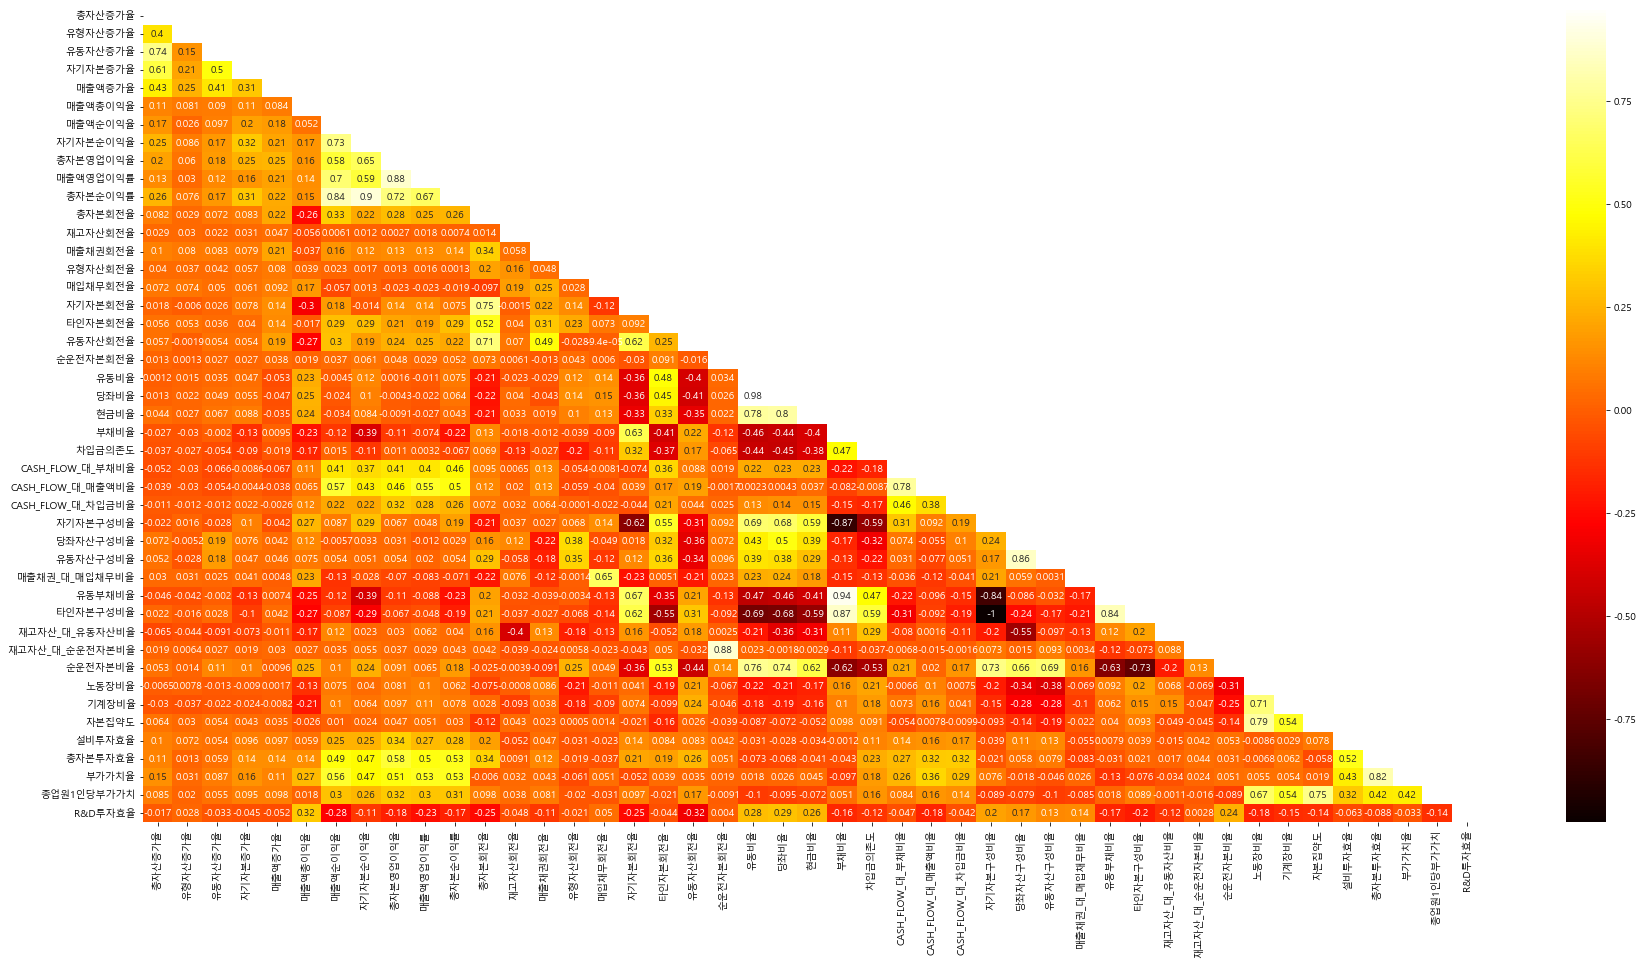

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("font", family="Malgun Gothic") # 시각화 할때 한글이 볼수 있게 하겠다
plt.rc("axes", unicode_minus=False)
plt.figure(figsize=(30,15))

sns.heatmap(ss_sc3.corr(),annot=True, cmap='hot',mask=mask)

In [112]:
ss_sc3 = ss_sc3.drop(['매출액영업이익률','총자본순이익률','자기자본회전율','당좌비율','현금비율','자기자본구성비율',
                      '유동자산구성비율','유동부채비율','타인자본구성비율','재고자산_대_순운전자본비율',
                      '부가가치율','유형자산증가율'],axis=1)

In [113]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF_Factor'] = [variance_inflation_factor(ss_sc3,i)for i in range(ss_sc3.shape[1])]
vif['features'] = ss_sc3.columns
# VIF 값이 높은 순으로 정렬
vif = vif.sort_values(by="VIF_Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

,VIF_Factor,features
0,82.940037,매입채무회전율
1,61.167449,CASH_FLOW_대_차입금비율
2,15.173641,매출채권_대_매입채무비율
3,10.680205,노동장비율
4,10.041444,재고자산회전율
5,9.929967,자본집약도
6,8.763076,종업원1인당부가가치
7,7.955948,순운전자본비율
8,7.836229,당좌자산구성비율
9,7.779838,CASH_FLOW_대_매출액비율


In [ ]:
# shap_pct(ss_sc3)

In [ ]:
# df.iloc[:,49:56]

In [ ]:
# q1 = df.iloc[:,49:56]
# ss_sc4 = pd.concat([ss_sc3,q1],axis=1)
# ss_sc4

In [34]:
import statsmodels.formula.api as smf
from tensorboard import summary
formula = '회생기업2 ~ C(매출원가감소율여부)'
log_reg = smf.logit(formula, data= df).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.486778
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  회생기업2   No. Observations:                 8748
Model:                          Logit   Df Residuals:                     8746
Method:                           MLE   Df Model:                            1
Date:                Thu, 06 Oct 2022   Pseudo R-squ.:               0.0005194
Time:                        15:53:26   Log-Likelihood:                -4258.3
converged:                       True   LL-Null:                       -4260.5
Covariance Type:            nonrobust   LLR p-value:                   0.03539
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.4509      0.027    -53.079      0.000      -1.504      -1.397
C(매출원가감소율여부)[T.1]     0.6932      0.314      2.207      0.027       0.078       1.309
=====================================================================================
"""

In [35]:
formula = '회생기업2 ~ C(직원감소율여부)'
log_reg = smf.logit(formula, data= df).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.487011
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  회생기업2   No. Observations:                 8748
Model:                          Logit   Df Residuals:                     8746
Method:                           MLE   Df Model:                            1
Date:                Thu, 06 Oct 2022   Pseudo R-squ.:               4.169e-05
Time:                        15:53:44   Log-Likelihood:                -4260.4
converged:                       True   LL-Null:                       -4260.5
Covariance Type:            nonrobust   LLR p-value:                    0.5512
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.4512      0.028    -51.076      0.000      -1.507      -1.395
C(직원감소율여부)[T.1]     0.0595      0.099      0.599      0.549      -0.135       0.254
===================================================================================
"""

In [36]:
formula = '회생기업2 ~ C(투자활동감소율여부)'
log_reg = smf.logit(formula, data= df).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.485981
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  회생기업2   No. Observations:                 8748
Model:                          Logit   Df Residuals:                     8746
Method:                           MLE   Df Model:                            1
Date:                Thu, 06 Oct 2022   Pseudo R-squ.:                0.002156
Time:                        15:54:07   Log-Likelihood:                -4251.4
converged:                       True   LL-Null:                       -4260.5
Covariance Type:            nonrobust   LLR p-value:                 1.816e-05
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.5156      0.032    -47.262      0.000      -1.578      -1.453
C(투자활동감소율여부)[T.1]     0.2638      0.061      4.335      0.000       0.145       0.383
=====================================================================================
"""

In [37]:
import statsmodels.formula.api as smf
from tensorboard import summary
formula = '회생기업2 ~ C(배당금감소율여부)'
log_reg = smf.logit(formula, data= df).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.483508
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  회생기업2   No. Observations:                 8748
Model:                          Logit   Df Residuals:                     8746
Method:                           MLE   Df Model:                            1
Date:                Thu, 06 Oct 2022   Pseudo R-squ.:                0.007234
Time:                        15:54:14   Log-Likelihood:                -4229.7
converged:                       True   LL-Null:                       -4260.5
Covariance Type:            nonrobust   LLR p-value:                 4.117e-15
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.3710      0.028    -48.125      0.000      -1.427      -1.315
C(배당금감소율여부)[T.1]    -0.7278      0.100     -7.273      0.000      -0.924      -0.532
====================================================================================
"""

In [38]:
import statsmodels.formula.api as smf
from tensorboard import summary
formula = '회생기업2 ~ C(자본증가율여부)'
log_reg = smf.logit(formula, data= df).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.486728
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  회생기업2   No. Observations:                 8748
Model:                          Logit   Df Residuals:                     8746
Method:                           MLE   Df Model:                            1
Date:                Thu, 06 Oct 2022   Pseudo R-squ.:               0.0006212
Time:                        15:54:34   Log-Likelihood:                -4257.9
converged:                       True   LL-Null:                       -4260.5
Covariance Type:            nonrobust   LLR p-value:                   0.02140
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.4501      0.027    -53.128      0.000      -1.504      -1.397
C(자본증가율여부)[T.1]     0.9801      0.404      2.426      0.015       0.188       1.772
===================================================================================
"""

In [39]:
import statsmodels.formula.api as smf
from tensorboard import summary
formula = '회생기업2 ~ C(변화율여부)'
log_reg = smf.logit(formula, data= df).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.486971
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  회생기업2   No. Observations:                 8748
Model:                          Logit   Df Residuals:                     8746
Method:                           MLE   Df Model:                            1
Date:                Thu, 06 Oct 2022   Pseudo R-squ.:               0.0001222
Time:                        15:54:34   Log-Likelihood:                -4260.0
converged:                       True   LL-Null:                       -4260.5
Covariance Type:            nonrobust   LLR p-value:                    0.3076
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.4431      0.027    -52.674      0.000      -1.497      -1.389
C(변화율여부)[T.1]    -0.2433      0.245     -0.993      0.321      -0.723       0.237
=================================================================================
"""

### 회귀분석

In [ ]:
# 필요한 라이브러리
import statsmodels.api as sm

# target은 종속변수, feature는 독립변수와 같다.
target = y
feature = x

# 상수항을 더해줘서 회귀식을 더 잘 적합할 수 있도록 만들어 준다.
feature_add = sm.add_constant(feature, has_constant='add')

# sm OLS 적합
model = sm.OLS(target, feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  회생기업2   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     12.85
Date:                Thu, 06 Oct 2022   Prob (F-statistic):           1.55e-16
Time:                        10:04:53   Log-Likelihood:                -4192.2
No. Observations:                8748   AIC:                             8400.
Df Residuals:                    8740   BIC:                             8457.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1734      0.011     15.909      0.000       0.152       0.195
매출원가감소율여부      0.1152      0.057      2.013      0.044       0.003       0.227
배당금감소율여부      -0.0932      0.013     -7.435      0.000      -0.118      -0.069
변화율여부         -0.0448      0.035     -1.285      0.199      -0.113       0.024
직원감소율여부        0.0048      0.016      0.307      0.759      -0.026       0.035
자본증가율여부        0.1797      0.077      2.339      0.019       0.029       0.330
투자활동감소율여부      0.0458      0.010      4.647      0.000       0.026       0.065
기업수명주기         0.0063      0.003      1.853      0.064      -0.000       0.013
==============================================================================
Omnibus:                     1956.930   Durbin-Watson:                   1.804
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3584.252
Skew:                           1.550   Prob(JB):                         0.00
Kurtosis:                       3.467   Cond. No.                         56.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

다행히 다중공선성은 사라졌군...

In [ ]:
def vif(data):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # VIF 출력을 위한 데이터 프레임 형성
    vif = pd.DataFrame()

    # VIF 값과 각 Feature 이름에 대해 설정
    vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    vif["features"] = data.columns 

    # VIF 값이 높은 순으로 정렬
    vif = vif.sort_values(by="VIF Factor", ascending=False)
    vif = vif.reset_index().drop(columns='index')
    
    return vif

vif(ss_sc3[['매출액증가율', '매출액총이익율', '매출액순이익율', '자기자본순이익율', '총자본영업이익율', '유형자산회전율',
       '유동자산회전율', '유동비율', '부채비율', 'CASH_FLOW_대_매출액비율', '순운전자본비율', '기계장비율',
       '자본집약도', '설비투자효율', '총자본투자효율', '종업원1인당부가가치']])

,VIF Factor,features
0,8.311991,종업원1인당부가가치
1,7.439546,자본집약도
2,3.782114,순운전자본비율
3,3.551685,자기자본순이익율
4,3.285022,매출액순이익율
5,2.816083,총자본투자효율
6,2.710678,CASH_FLOW_대_매출액비율
7,2.538518,기계장비율
8,2.487871,유동비율
9,2.368626,부채비율


### 후진제거법

In [ ]:
def backward_regression(feature, target,
                           initial_list=[], 
                           threshold_out = 0.05):
    
    import matplotlib.pyplot as plt
    import statsmodels.api as sm
    import pandas as pd
    import warnings
    warnings.filterwarnings("ignore")
    
    feature_list = feature.columns.tolist()  
    sv_per_step = [] ## 각 스텝별로 선택된 변수들
    adj_r_squared_list = [] ## 각 스텝별 수정된 결정계수
    steps = [] ## 스텝
    step = 0
    included = feature.columns.tolist() 
    
    while True:
        changed=False
        model = sm.OLS(target, sm.add_constant(feature[included])).fit(disp=0)
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:] # 각 feature의 P값을 의미함
        worst_pval = pvalues.max()	# P 값이 가장 높은 것 선정
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
        
        step += 1
        steps.append(step)        
        adj_r_squared = sm.OLS(target, sm.add_constant(feature[included])).fit(disp=0).rsquared_adj
        adj_r_squared_list.append(adj_r_squared)
        sv_per_step.append(included.copy())
        
        if not changed:
            break
    
    # 최종모델 출력
    model = sm.OLS(target, sm.add_constant(feature[included])).fit()
    print(model.summary())
    print(feature[included].columns)

    
    # fig = plt.figure(figsize=(40,25))
    # plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=10)
    # plt.plot(steps, adj_r_squared_list, marker='o')
    # plt.ylabel('adj_r_squared',fontsize=15)
    # plt.grid(True)
    # plt.show()

    return model

backward_model = backward_regression(x,y)

                            OLS Regression Results                            
Dep. Variable:                  회생기업1   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     40.49
Date:                Thu, 06 Oct 2022   Prob (F-statistic):           3.13e-18
Time:                        10:03:00   Log-Likelihood:                -1324.5
No. Observations:                8748   AIC:                             2655.
Df Residuals:                    8745   BIC:                             2676.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0545      0.007      7.591      0.0

In [ ]:
def vif(data):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # VIF 출력을 위한 데이터 프레임 형성
    vif = pd.DataFrame()

    # VIF 값과 각 Feature 이름에 대해 설정
    vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    vif["features"] = data.columns 

    # VIF 값이 높은 순으로 정렬
    vif = vif.sort_values(by="VIF Factor", ascending=False)
    vif = vif.reset_index().drop(columns='index')
    
    return vif

vif(ss_sc3[['자기자본증가율', '매출액증가율', '매출액총이익율', '매출액순이익율', '자기자본순이익율', '총자본영업이익율',
       '유형자산회전율', '유동자산회전율', '유동비율', '부채비율', 'CASH_FLOW_대_매출액비율', '순운전자본비율',
       '기계장비율', '자본집약도', '총자본투자효율', '종업원1인당부가가치']])

,VIF Factor,features
0,8.259948,종업원1인당부가가치
1,7.441608,자본집약도
2,3.760216,순운전자본비율
3,3.648699,자기자본순이익율
4,3.280950,매출액순이익율
5,2.764838,CASH_FLOW_대_매출액비율
6,2.521284,총자본투자효율
7,2.519588,기계장비율
8,2.484079,유동비율
9,2.364421,총자본영업이익율


### 릿지

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score
%matplotlib inline

ridge = Ridge(alpha = 100)
neg_mse_scores = cross_val_score(ridge, ss_sc3, y, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-0.096 -0.107 -0.152 -0.206 -0.202]
 5 folds 의 개별 RMSE scores :  [0.31  0.328 0.39  0.454 0.449]
 5 folds 의 평균 RMSE : 0.386 


In [ ]:
from sklearn.linear_model import Lasso, ElasticNet, Ridge
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV, LogisticRegressionCV
# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환 
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, 
                        verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, 
                                             y_target_n, scoring="neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
       
        model.fit(X_data_n , y_target_n)
        if return_coeff:
            # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가. 
            coeff = pd.Series(data=model.coef_ , index=X_data_n.columns )
            colname='alpha:'+str(param)
            coeff_df[colname] = coeff

    return coeff_df

# 릿지에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
ridge_alpha = [0,1,2,3,4,5]
coeff_lasso_df =get_linear_reg_eval('Ridge', params=ridge_alpha, X_data_n=ss_sc3, y_target_n=y)

# 반환된 coeff_lasso_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(ridge_alpha[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

#######  Ridge #######
alpha 0일 때 5 폴드 세트의 평균 RMSE: 0.386 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 0.386 
alpha 2일 때 5 폴드 세트의 평균 RMSE: 0.386 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 0.386 
alpha 4일 때 5 폴드 세트의 평균 RMSE: 0.386 
alpha 5일 때 5 폴드 세트의 평균 RMSE: 0.386 


,alpha:0,alpha:1,alpha:2,alpha:3,alpha:4,alpha:5
CASH_FLOW_대_매출액비율,2.000501,0.553611,0.322656,0.228289,0.177038,0.144889
종업원1인당부가가치,0.537427,0.452227,0.400574,0.362454,0.332841,0.309083
자기자본순이익율,0.235287,0.224924,0.219605,0.215323,0.211617,0.208314
부채비율,0.219222,0.195743,0.180914,0.168803,0.158421,0.149318
순운전자본회전율,0.213984,0.136778,0.100759,0.079530,0.065552,0.055667
기계장비율,0.212886,0.222059,0.221313,0.219604,0.217640,0.215592
재고자산회전율,0.168801,0.137051,0.110006,0.091423,0.078050,0.068001
유형자산회전율,0.159382,0.161294,0.160465,0.159401,0.158305,0.157223
R&D투자효율,0.128195,0.108167,0.100596,0.094719,0.089594,0.084977
총자본영업이익율,0.094650,0.095402,0.095211,0.095078,0.095016,0.095006


진짜 릿지는 못 써먹겠다....ㅂㄷㅂㄷ

### 라쏘
- 주요 파라미터 alpha = 라쏘 회귀의 alpha L1 규제 계수
- L1규제는 불필요한 회귀 계수를 급격하게 감소시켜 0으로 만들고 제거.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score
%matplotlib inline

ridge = Lasso(alpha = 100)
neg_mse_scores = cross_val_score(ridge, x, y, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-0.057 -0.108 -0.171 -0.24  -0.236]
 5 folds 의 개별 RMSE scores :  [0.239 0.328 0.414 0.49  0.485]
 5 folds 의 평균 RMSE : 0.391 


In [ ]:
from sklearn.linear_model import Lasso, ElasticNet, Ridge
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV, LogisticRegressionCV
# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환 
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, 
                        verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, 
                                             y_target_n, scoring="neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
       
        model.fit(X_data_n , y_target_n)
        if return_coeff:
            # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가. 
            coeff = pd.Series(data=model.coef_ , index=X_data_n.columns )
            colname='alpha:'+str(param)
            coeff_df[colname] = coeff

    return coeff_df

# 라쏘에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [0.0007,0.0008,0.0009,0.001,0.002]
coeff_lasso_df =get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=x, y_target_n=y)

# 반환된 coeff_lasso_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

#######  Lasso #######
alpha 0.0007일 때 5 폴드 세트의 평균 RMSE: 0.391 
alpha 0.0008일 때 5 폴드 세트의 평균 RMSE: 0.391 
alpha 0.0009일 때 5 폴드 세트의 평균 RMSE: 0.391 
alpha 0.001일 때 5 폴드 세트의 평균 RMSE: 0.391 
alpha 0.002일 때 5 폴드 세트의 평균 RMSE: 0.391 


,alpha:0.0007,alpha:0.0008,alpha:0.0009,alpha:0.001,alpha:0.002
투자활동감소율여부,0.041747,0.041154,0.040561,0.039968,0.034040
기업수명주기,0.005770,0.005668,0.005565,0.005463,0.004440
매출원가감소율여부,0.000000,0.000000,0.000000,0.000000,0.000000
변화율여부,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
직원감소율여부,0.000000,0.000000,0.000000,0.000000,0.000000
자본증가율여부,0.000000,0.000000,0.000000,0.000000,0.000000
배당금감소율여부,-0.087356,-0.086452,-0.085548,-0.084644,-0.075602


일단 0.007로 선택 했습니다

In [ ]:
def vif(data):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # VIF 출력을 위한 데이터 프레임 형성
    vif = pd.DataFrame()

    # VIF 값과 각 Feature 이름에 대해 설정
    vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    vif["features"] = data.columns 

    # VIF 값이 높은 순으로 정렬
    vif = vif.sort_values(by="VIF Factor", ascending=False)
    vif = vif.reset_index().drop(columns='index')
    
    return vif

vif(ss_sc3[['기계장비율','자기자본순이익율','종업원1인당부가가치','유형자산회전율','CASH_FLOW_대_부채비율','총자본영업이익율',
         '유동자산회전율','설비투자효율','순운전자본비율','매출액총이익율','총자본회전율','차입금의존도','총자산증가율',
         '타인자본회전율','총자본투자효율','유동비율']])

,VIF Factor,features
0,4.567926,순운전자본비율
1,4.114495,총자본회전율
2,3.945218,유동자산회전율
3,3.401100,타인자본회전율
4,3.228498,유동비율
5,2.807554,종업원1인당부가가치
6,2.502521,기계장비율
7,2.344749,총자본투자효율
8,2.284602,총자본영업이익율
9,2.032346,자기자본순이익율


In [ ]:
# e = df[['회사명','거래소코드','회계년도']]
# e2 = pd.concat([e,ss_sc3],axis=1)
# r = df[['매출원가감소율여부','배당금감소율여부','변화율여부','직원감소율여부','자본증가율여부','투자활동감소율여부']]
# r2 = pd.concat([e2,r],axis=1)
# r2 = r2[['회사명','거래소코드','회계년도','유동자산회전율','총자본투자효율','재고자산_대_유동자산비율',
#          '당좌자산구성비율','차입금의존도','총자본영업이익율','자기자본순이익율',
#          '매출원가감소율여부','배당금감소율여부','변화율여부','직원감소율여부','자본증가율여부','투자활동감소율여부']]
# r2.to_csv('스탠다드라쏘데이터.csv',encoding='cp949',index=False)
# r2

12개 선정입니다

### 엘라스틱넷
- L2규제와 L1규제를 결합한 회귀. 비용함수의 목표는 함수식을 최소화 하는 회귀계수(W)를 찾는 것.
- 엘라스틱넷은 라쏘회귀의 성향이 강해 L2규제를 추가한 것. 상대적으로 시간이 오래 걸린다.
- 주요 파라미터 : -alpha(aL1+bL2=L1의 alpha + L2의 alpha) -l1_ratio (a/a+b)

In [ ]:
from sklearn.linear_model import Lasso, ElasticNet, Ridge
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV, LogisticRegressionCV
# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환 
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, 
                        verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, 
                                             y_target_n, scoring="neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
       
        model.fit(X_data_n , y_target_n)
        if return_coeff:
            # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가. 
            coeff = pd.Series(data=model.coef_ , index=X_data_n.columns )
            colname='alpha:'+str(param)
            coeff_df[colname] = coeff

    return coeff_df

# 엘라스틱에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
elastic_alpha = [0.001,0.002,0.003,0.004,0.005]
coeff_lasso_df =get_linear_reg_eval('ElasticNet', params=elastic_alpha, X_data_n=x, y_target_n=y)

# 반환된 coeff_lasso_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(elastic_alpha[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

#######  ElasticNet #######
alpha 0.001일 때 5 폴드 세트의 평균 RMSE: 0.391 
alpha 0.002일 때 5 폴드 세트의 평균 RMSE: 0.391 
alpha 0.003일 때 5 폴드 세트의 평균 RMSE: 0.391 
alpha 0.004일 때 5 폴드 세트의 평균 RMSE: 0.391 
alpha 0.005일 때 5 폴드 세트의 평균 RMSE: 0.391 


,alpha:0.001,alpha:0.002,alpha:0.003,alpha:0.004,alpha:0.005
투자활동감소율여부,0.041676,0.037469,0.033277,0.029100,0.024936
기업수명주기,0.005764,0.005043,0.004323,0.003605,0.002887
매출원가감소율여부,0.000000,0.000000,0.000000,0.000000,0.000000
변화율여부,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
직원감소율여부,0.000000,0.000000,0.000000,0.000000,0.000000
자본증가율여부,0.000000,0.000000,0.000000,0.000000,0.000000
배당금감소율여부,-0.087121,-0.080592,-0.074098,-0.067639,-0.061214


일단 여기도 0.0005로 선정 합니다

In [ ]:
def vif(data):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # VIF 출력을 위한 데이터 프레임 형성
    vif = pd.DataFrame()

    # VIF 값과 각 Feature 이름에 대해 설정
    vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    vif["features"] = data.columns 

    # VIF 값이 높은 순으로 정렬
    vif = vif.sort_values(by="VIF Factor", ascending=False)
    vif = vif.reset_index().drop(columns='index')
    
    return vif

vif(ss_sc3[['기계장비율','자기자본순이익율','유형자산회전율','종업원1인당부가가치',
         'CASH_FLOW_대_부채비율','총자본영업이익율','유동자산회전율','설비투자효율','순운전자본비율','매출액총이익율'
         ,'총자본회전율','당좌자산구성비율','차입금의존도','총자산증가율','타인자본회전율','총자본투자효율','유동비율']])

,VIF Factor,features
0,5.198510,순운전자본비율
1,5.098537,총자본회전율
2,4.543014,유동자산회전율
3,3.536744,타인자본회전율
4,3.239500,유동비율
5,2.807555,종업원1인당부가가치
6,2.735153,당좌자산구성비율
7,2.523033,기계장비율
8,2.356259,총자본투자효율
9,2.284613,총자본영업이익율


### 교차검증 전 정확도 확인

13개 선정입니다

3개 공통을 추출한 결과 자기자본순이익율,CASH_FLOW_대_매출액비율 이렇게 2개 나왔네용;; 좀 더 늘리고 봐야되나...

In [ ]:
# from numpy import arange

# from pandas import read_csv

# from sklearn.linear_model import LassoCV,RidgeCV

# from sklearn.model_selection import RepeatedKFold

# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# # define model

# model = RidgeCV(alphas=arange(0, 1, 0.001), cv=cv, n_jobs=1)

# # fit model

# model.fit(ss_sc4, y)

# # summarize chosen configuration

# print('alpha: %f' % model.alpha_)